# 引入所需的Package

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 載入手寫數字圖片

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 將圖片進行處理

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

# 開始製作我們的模型吧


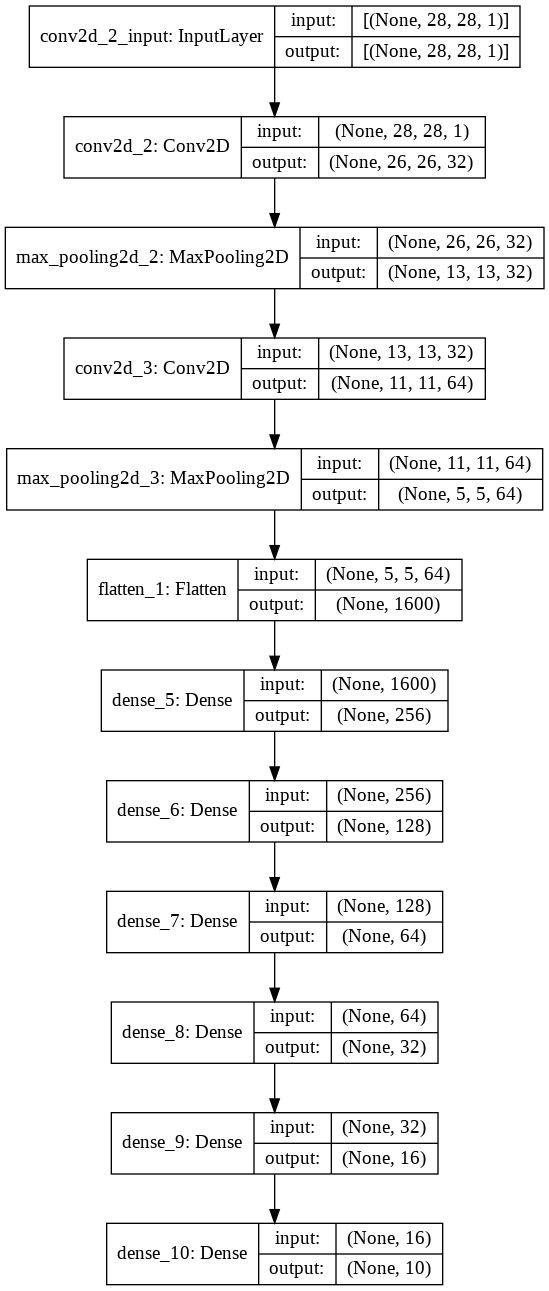

In [ ]:
CNN = keras.Sequential(name = 'CNN')
# 建立 convalution層 抓取圖片的特徵，並將圖片的特徵進行強化
CNN.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
CNN.add(layers.MaxPooling2D((2,2)))
CNN.add(layers.Conv2D(64,(3,3),activation='relu'))
CNN.add(layers.MaxPooling2D((2,2)))
# 拉平模型
CNN.add(layers.Flatten())
# 建立神經網路 獲得模型的權重
CNN.add(layers.Dense(256,activation='relu'))
CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dense(64,activation='relu'))
CNN.add(layers.Dense(32,activation='relu'))
# 最後一層要設為我們要輸出的10個解答，也就是0....9的數字
CNN.add(layers.Dense(10,activation='softmax'))
keras.utils.plot_model(CNN,show_shapes=True)

# 訓練模型

In [ ]:
CNN.compile(optimizer='adam',
      loss=keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy'])

In [ ]:
CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 6ms/step - loss: 0.2072 - accuracy: 0.9371
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0581 - accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0390 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0304 - accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0238 - accuracy: 0.9932


In [ ]:
np.mean(CNN.predict_classes(x_test)==y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9898

# 使用模型辨識數字

In [ ]:
predicts = CNN.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print('預測結果為{}, 實際解答為{}'.format(predicts[5],y_test[5]))

預測結果為1, 實際解答為1


# 儲存模型


In [ ]:
CNN.save('My_model.h5')

In [ ]:
del CNN

# 載入模型


In [ ]:
model = keras.models.load_model('My_model.h5')

In [ ]:
predicts = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print('預測結果為{}, 實際解答為{}'.format(predicts[5],y_test[5]))

預測結果為1, 實際解答為1


# 解碼遊戲

請用剛剛完成的模型，幫助大木博士解開實驗室的密碼吧

帳號提示: {71, 55 ,84 ,63} 英文字母對照 [D, a, n, c, i, n, g,  g, i, r, l] => 0~9

密碼提示: {40,57,61}